# Deep RL Navigation Problem
## Necessary libraries
This Notebook makes use of the custom *BananaEnvironment* class, defined in the standalone file *environment.py*. The rest of the libraries are common Data Science tools.

In [1]:
from environment import BananaEnvironment
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

## Set parameters
The list *agent_params* contains each one of the agent configurations to be trained, in the form of a dictionary with a certain *title* and the relevant *params*. It is currently set to train a Vanilla Deep Q Learning agent, each of its three variants Double Deep Q Learning, Prioritized Experience Replay and Dueling Deep Q Learning, as well as the combination of the three of them.

In turn, *training parameters* defines the number of episodes, as well as the decay for the epsilon-greedy policy.

Lastly, the variables *rolling_average_window* and *solved_threshold* allow to define the fact that the environment is considered solved when the average reward over the last 100 episodes is higher than 13.

In [2]:
agent_params = [
    {'title': 'DQN', 'params': {'ddqn': False, 'prioritized_experience_replay': 0., 'dueling': False}},
    {'title': 'DDQN', 'params': {'ddqn': True, 'prioritized_experience_replay': 0., 'dueling': False}},
    {'title': 'Prioritized Experience Replay', 'params': {'ddqn': False, 'prioritized_experience_replay': 0.7, 'dueling': False}},
    {'title': 'Dueling', 'params': {'ddqn': False, 'prioritized_experience_replay': 0., 'dueling': True}},
    {'title': 'DDQN + PER + Dueling', 'params': {'ddqn': True, 'prioritized_experience_replay': 0.7, 'dueling': True}},
]
training_params = {'n_episodes': 1000, 'eps_decay': 0.997, 'save': True}
rolling_average_window = 100
solved_threshold = 13
sns.set_theme(style='darkgrid')

## Auxiliary functions
The functions defined below make use of the code defined in *environment.py*, and indirectly in *agent.py* and *model.py*, to further automate the training of the agents within this Notebook. Moreover, *plot_scores* makes use of the *Seaborn* visualization library to produce a nice plot of the agents training across the episodes.

In [3]:
def train_algorithm_in_environment(environment, agent_params, training_params):
    with environment(agent_params=agent_params) as env:
        scores = env.train(**training_params)
    return scores

def scores_to_df(scores):
    df = pd.DataFrame(scores, columns=['Score'])
    rolling_average = df['Score'].rolling(rolling_average_window).mean()
    df[f'Rolling average ({rolling_average_window})'] = rolling_average
    df['Environment solved'] = solved_threshold
    df.index.name = 'Episode'
    return df

def plot_scores(df_scores, title):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    fig.suptitle(title, fontsize=20)
    _ = sns.lineplot(ax=ax,data=df_scores)

def train_and_plot(idx):
    training_params['saveas'] = f'checkpoint_{agent_params[idx]["title"]}'
    scores = train_algorithm_in_environment(BananaEnvironment, agent_params[idx]['params'], training_params)
    clear_output()
    df_scores = scores_to_df(scores)
    plot_scores(df_scores, agent_params[idx]['title'])
    return df_scores

def num_episodes_to_solve(df_scores):
    df_solved = df_scores[df_scores[f'Rolling average ({rolling_average_window})'] > solved_threshold]
    if df_solved.shape[0] == 0:
        return np.nan
    else:
        return df_solved.iloc[0].name

## Training of the agents
In the following four cells, an agent is trained according to vanilla Deep Q Learning, Double Deep Q Learning, Prioritized Experience Replay, Dueling Deep Q Learning, as well as the latter three alltogether.

The RL agent took 764 episodes to solve the environment
CPU times: user 5min 31s, sys: 26.5 s, total: 5min 57s
Wall time: 11min 36s


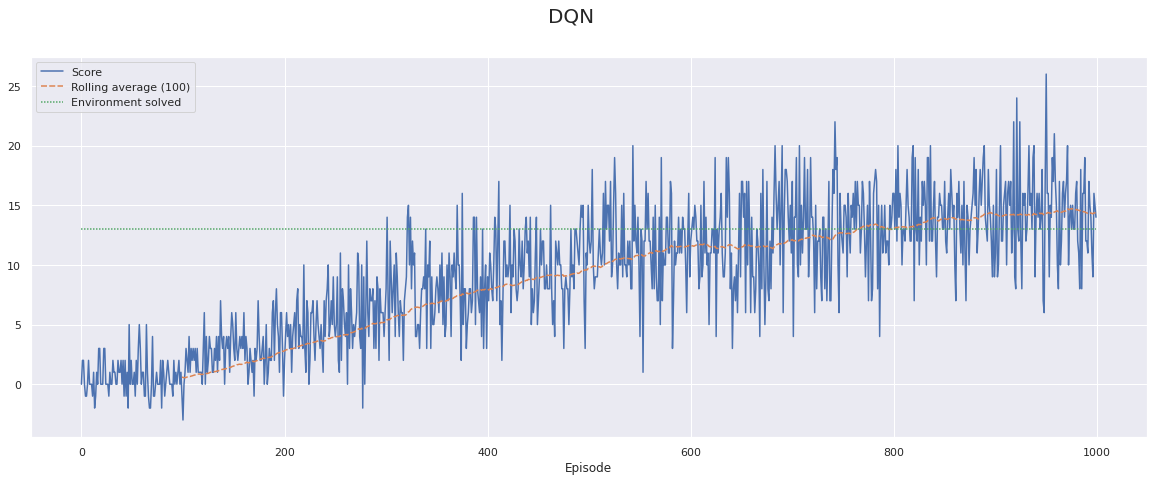

In [4]:
%%time
df_scores0 = train_and_plot(0)
needed_episodes_0 = num_episodes_to_solve(df_scores0)
print(f'The RL agent took {needed_episodes_0} episodes to solve the environment')

The RL agent took 667 episodes to solve the environment
CPU times: user 5min 45s, sys: 26.2 s, total: 6min 11s
Wall time: 11min 47s


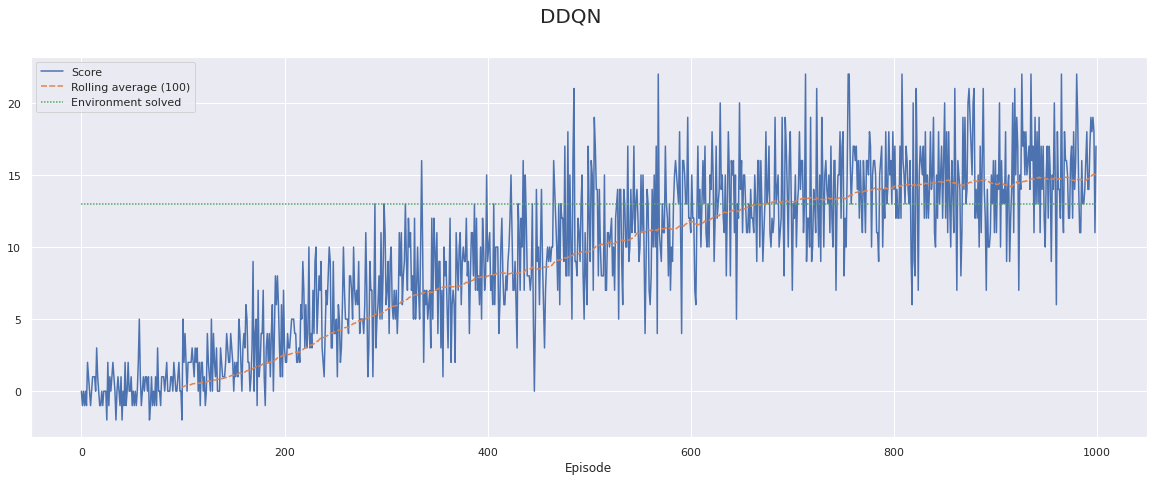

In [4]:
%%time
df_scores1 = train_and_plot(1)
needed_episodes_1 = num_episodes_to_solve(df_scores1)
print(f'The RL agent took {needed_episodes_1} episodes to solve the environment')

The RL agent took 735 episodes to solve the environment
CPU times: user 56min 21s, sys: 35.5 s, total: 56min 57s
Wall time: 1h 3min 52s


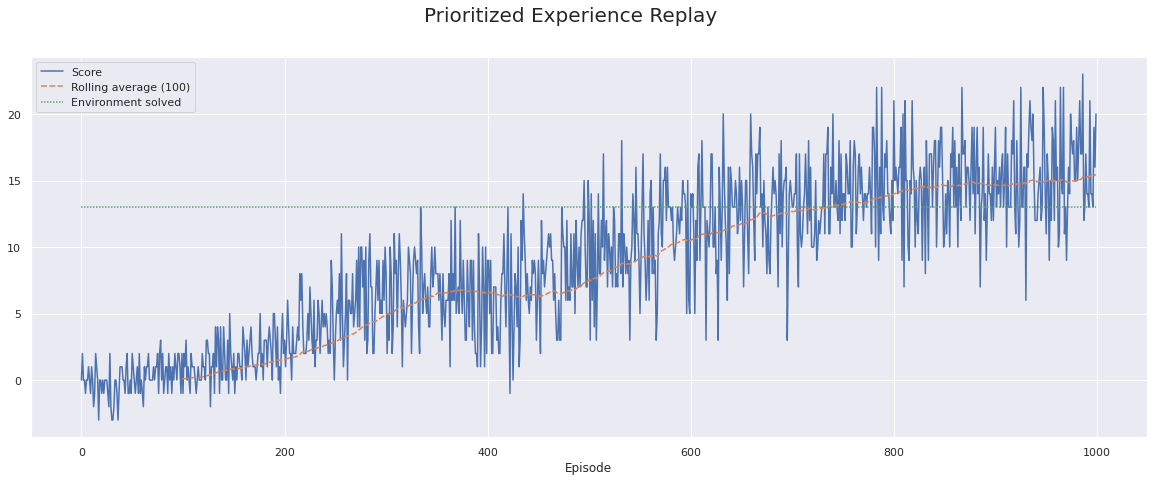

In [3]:
%%time
df_scores2 = train_and_plot(2)
needed_episodes_2 = num_episodes_to_solve(df_scores2)
print(f'The RL agent took {needed_episodes_2} episodes to solve the environment')

The RL agent took 670 episodes to solve the environment
CPU times: user 6min 13s, sys: 26.5 s, total: 6min 40s
Wall time: 12min 23s


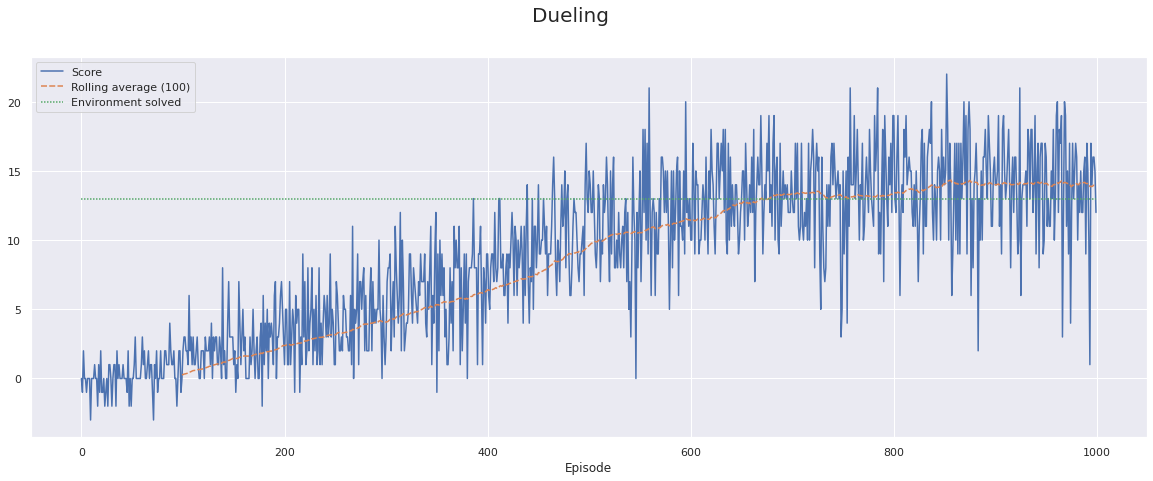

In [3]:
%%time
df_scores3 = train_and_plot(3)
needed_episodes_3 = num_episodes_to_solve(df_scores3)
print(f'The RL agent took {needed_episodes_3} episodes to solve the environment')

The RL agent took 701 episodes to solve the environment
CPU times: user 59min 38s, sys: 36.2 s, total: 1h 14s
Wall time: 1h 7min 12s


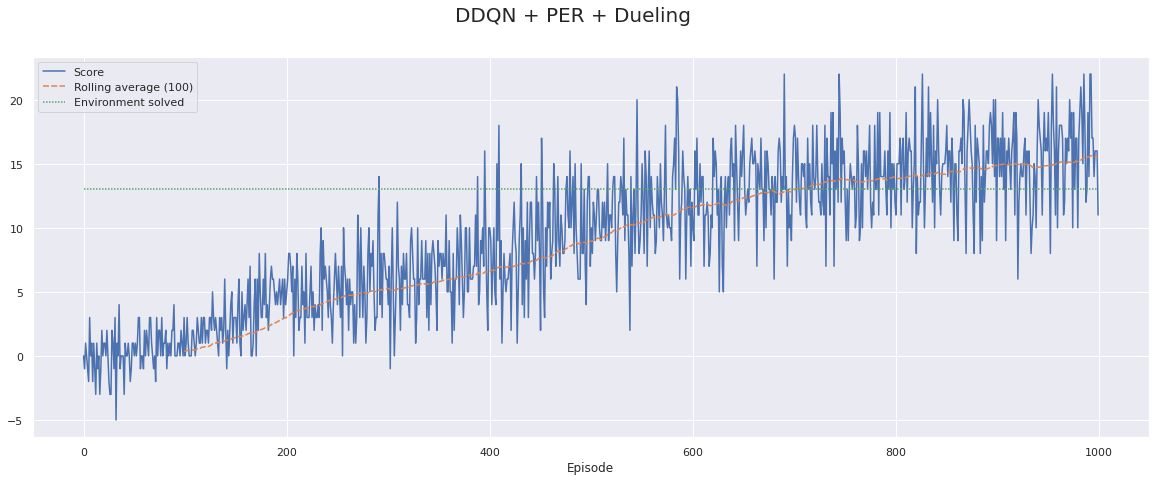

In [4]:
%%time
df_scores4 = train_and_plot(4)
needed_episodes_4 = num_episodes_to_solve(df_scores4)
print(f'The RL agent took {needed_episodes_4} episodes to solve the environment')

## Results
It is worth noting that the old version of Unity Environment prevents to launch a new environment after the previous one has been closed, requiring a kernel restart. Therefore, the following cell makes sure that the results obtained above across several sessions are hard coded into the current session. It is also worth noting that this issue no longer occurs on current versions of Unity ML-Agents.

In [5]:
needed_episodes_0 = 764
needed_episodes_1 = 667
needed_episodes_2 = 735
needed_episodes_3 = 670
needed_episodes_4 = 701

title = 'Needed episodes to solve the environment'
indexes = [ap['title'] for ap in agent_params]
indexes[2] = 'PER'
needed_episodes = pd.DataFrame([needed_episodes_0, needed_episodes_1, needed_episodes_2, needed_episodes_3, needed_episodes_4], index=indexes, columns=[title])
needed_episodes = needed_episodes.reset_index().rename(columns={'index': 'Algorithm'})

### Comparison of time to solve the environment
The following chart provides insightful information about the previous runs. It is necessary to say that it only shows information of a single training per case, while there exists high stochasticity. Therefore, it is not a thorough comparison. Even so, this has been a very interesting exercise in order to further understand the dynamics of the Deep Q Learning algorithm and three of its variants.

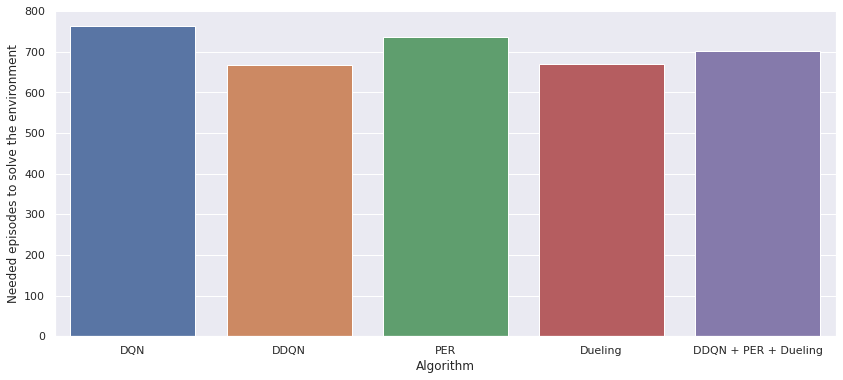

In [6]:
ax = sns.barplot(x='Algorithm', y=title, data=needed_episodes)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)

## Watch the agents of the learned models interact with the environment

In [4]:
run_params = {'n_episodes': 30}
rolling_average_window = 5

def play_algorithm_in_environment(environment, filename, agent_params, run_params):
    with environment(agent_params=agent_params) as env:
        env.load_parameters(filename)
        scores = env.play(**run_params)
    return scores

def play_and_plot(idx):
    filename = Path().resolve() / 'checkpoints' / f'checkpoint_{agent_params[idx]["title"]}.pt'
    scores = play_algorithm_in_environment(BananaEnvironment, filename, agent_params[idx]['params'], run_params)
    clear_output()
    df_scores = scores_to_df(scores)
    plot_scores(df_scores, agent_params[idx]['title'])
    return df_scores

CPU times: user 14.7 s, sys: 1.8 s, total: 16.5 s
Wall time: 15min 5s


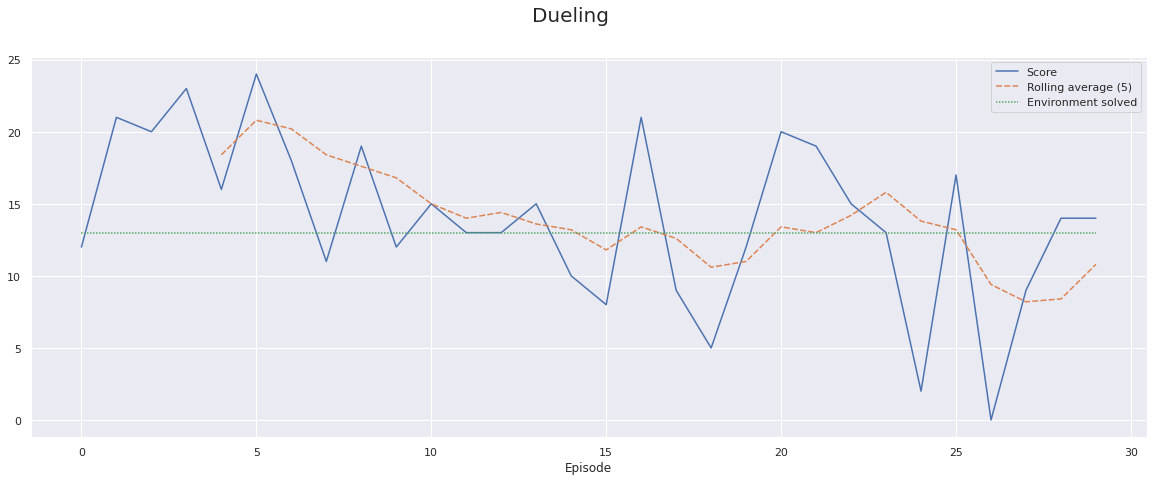

In [5]:
%%time
_ = play_and_plot(3)